# Problem Statement
You work for a consumer finance company which specialises in lending various types of loans to urban customers. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Reading the loan dataset
df=pd.read_csv('./loan.csv')
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# To get number of rows and columns and information about dataset
df.shape
df.info(max_cols=111)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    id                              39717 non-null  int64  
 1    member_id                       39717 non-null  int64  
 2    loan_amnt                       39717 non-null  int64  
 3    funded_amnt                     39717 non-null  int64  
 4    funded_amnt_inv                 39717 non-null  float64
 5    term                            39717 non-null  object 
 6    int_rate                        39717 non-null  object 
 7    installment                     39717 non-null  float64
 8    grade                           39717 non-null  object 
 9    sub_grade                       39717 non-null  object 
 10   emp_title                       37258 non-null  object 
 11   emp_length                      38642 non-null  object 
 12   home_ownership  

## Data Understanding

1. The dataset contains information about past loan applicants and their loan statuses, categorized as 'Fully Paid', 'Charged Off', and 'Current'. The objective is to identify the factors influencing default tendencies. Since the status of 'Current' customers is uncertain, they will be excluded from analysis, focusing only on 'Fully Paid' and 'Charged Off' cases. 'Charged Off' denotes defaulters.
2. In the dataset the target variable which we want to compare across the independent variables, is loan status.
   The strategy is to figure out compare the default rates across various independent variables and identify the ones that affect default rate the most.
3. There are several columns contain null values. We need to drop the columns which contain missing values.
4. Moreover, some columns, like 'id' and 'member id', not necessary for the analysis and can be removed. The focus will be on relevant attributes to streamline the analysis process effectively.

In [4]:
# summarising percentage of missing values in each column
round(100*df.isnull().mean(),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

## Data Cleaning & Data Manipulation
You can see that there are many missing columns with 100%. First, let's get rid of the columns having 100% missing values.

In [5]:
#dropping the column which contain all missing values
df.dropna(axis=1, how='all',inplace=True)
df

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


In [6]:
#again checking percentage of missing values in each column
round(100*df.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### Now, removing the columns which has missing values percentage more than 50%

In [7]:
#dropping columns morethan 50% missing values
df=df.drop(columns=['next_pymnt_d','mths_since_last_delinq','mths_since_last_record'],axis=1)

In [8]:
df.shape

(39717, 54)

In [9]:
#again checking percentage of missing values in each column
round(100*df.isnull().mean(),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.59
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

#### Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance etc.).
#### Now, the customer behaviour variables are not available at the time of loan application, and thus they cannot be used as predictors for credit approval. SO we are dropping those columns which are not useful for analysis.

In [10]:
# Drop the columns which are not required for the analysis.
df_not_required = ['id', 'member_id', 'url', 'desc','zip_code','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type']
df.drop(df_not_required,axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   39717 non-null  int64  
 1   funded_amnt                 39717 non-null  int64  
 2   funded_amnt_inv             39717 non-null  float64
 3   term                        39717 non-null  object 
 4   int_rate                    39717 non-null  object 
 5   installment                 39717 non-null  float64
 6   grade                       39717 non-null  object 
 7   sub_grade                   39717 non-null  object 
 8   emp_title                   37258 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                     397

In [11]:
df.shape

(39717, 28)

#### Let's remove columns with only one unique value, as these won't provide useful insights for our analysis.

In [12]:
df_unique = df.nunique()
df_unique.sort_values()

tax_liens                         1
pymnt_plan                        1
initial_list_status               1
policy_code                       1
collections_12_mths_ex_med        1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
funded_amnt_inv                8205
installment                   15383
title                         19615
emp_title                   

In [13]:
list_of_unique_val_col = df_unique[df_unique.values==1]
list_of_unique_val_col

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [14]:
df.drop(list_of_unique_val_col.index.tolist(),axis=1,inplace=True)

In [15]:
df.shape

(39717, 20)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   funded_amnt           39717 non-null  int64  
 2   funded_amnt_inv       39717 non-null  float64
 3   term                  39717 non-null  object 
 4   int_rate              39717 non-null  object 
 5   installment           39717 non-null  float64
 6   grade                 39717 non-null  object 
 7   sub_grade             39717 non-null  object 
 8   emp_title             37258 non-null  object 
 9   emp_length            38642 non-null  object 
 10  home_ownership        39717 non-null  object 
 11  annual_inc            39717 non-null  float64
 12  verification_status   39717 non-null  object 
 13  issue_d               39717 non-null  object 
 14  loan_status           39717 non-null  object 
 15  purpose            

#### Filtering the dataset based on loan_status being either "Charged Off" which is default or "Fully Paid", as the status "Current" applies to customers whose loans are currently active and doesn't provide definitive information on whether they will be fully paid or charged off by the end of the loan term.

In [17]:
df.loan_status.value_counts()

loan_status
Fully Paid     32950
Charged Off     5627
Current         1140
Name: count, dtype: int64

In [18]:
df=df[df['loan_status'].isin(['Fully Paid','Charged Off'])]
df.shape

(38577, 20)

In [19]:
round(100*df.isnull().mean(),2)

loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               6.19
emp_length              2.68
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
purpose                 0.00
title                   0.03
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.81
dtype: float64

#### Missing Value Imputation

In [20]:
df.emp_title.value_counts()

emp_title
US Army                                     131
Bank of America                             107
IBM                                          65
AT&T                                         57
Kaiser Permanente                            56
                                           ... 
amneal pharmaceuticals                        1
Net Equity Financial                          1
Kernersville Fire Department                  1
The Keith Corp. (empl by county, now Kei      1
Evergreen Center                              1
Name: count, Length: 28027, dtype: int64

In [21]:
df.emp_title.mode()

0    US Army
Name: emp_title, dtype: object

#### emp_title column is categorical variable. we can impute the missing value with mode. But by replacing the missing value with 'US Army' which is not meaningful. So we will replace with 'Unknown'.

In [22]:
# drop the missing values from the emp_title column
# Fill null values in 'emp_title' with 'Unknown'

df['emp_title'].fillna('Unknown', inplace = True)

# Now, 'Unknown' has been used to replace all the null values in the 'emp_title' column.
df.shape

(38577, 20)

#### In the dataset, emp_length has 2.68% missing values,pub_rec_bankruptcies has 1.81% missing values which are very less. so we can remove the rows with missing values.

In [23]:
# drop the missing values from the emp_length column
df = df[~df['emp_length'].isnull()]
df.shape

(37544, 20)

In [24]:
# drop the missing values from the emp_length column
df = df[~df['pub_rec_bankruptcies'].isnull()]
df.shape

(36847, 20)

In [25]:
#Observe values for title column
df.title.value_counts()


title
Debt Consolidation                        2032
Debt Consolidation Loan                   1582
Personal Loan                              600
Consolidation                              474
debt consolidation                         453
                                          ... 
utang                                        1
Angela's Personal Loan                       1
Joe's consolodation loan                     1
Pay off the credit cards                     1
Merging 2 Accounts into one to save $$       1
Name: count, Length: 18432, dtype: int64

####  title column falls under categorical variable but the values cannot be categorized due to variations in values hence it will be difficult to carry on analysis. So we will drop this column.

In [26]:
#Drop column title
df.drop(["title"],axis=1,inplace = True)
df.shape

(36847, 19)

In [27]:
df.isnull().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64

### Handling Data Types

In [28]:
#Checking datatypes
df.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
pub_rec_bankruptcies    float64
dtype: object

#### Based on the observation we have to make following changes:
    1. Convert funded_amnt_inv float64 to int64
    2. Convert int_rate to float64 after removing % symbol
    3. Convert annual_inc to int64
    4. Convert issues_d to datetime
    5. Convert pub_rec_bankruptcies to int64
    6. Removing '+' from emp_length
    7. Remove months from term column
    8. Adding loan_income ratio

In [29]:
#Convert "funded_amnt_inv" to int64
print(df.funded_amnt_inv.dtype)
df.funded_amnt_inv = df.funded_amnt_inv.astype("int64")
print(df.funded_amnt_inv.dtype)

float64
int64


In [30]:
#Convert "int_rate" to "float64" after removing "%" symbol.
df.int_rate = df.int_rate.str.replace("%",'').astype('float64')
print(df.int_rate)

0        10.65
1        15.27
2        15.96
3        13.49
5         7.90
         ...  
39562    10.28
39573    10.59
39623    12.49
39666    11.22
39680    11.86
Name: int_rate, Length: 36847, dtype: float64


In [31]:
#Convert annual_inc to int64
df.annual_inc = df.annual_inc.astype("int64")
df.annual_inc.dtype

dtype('int64')

In [32]:
#Convert "issue_d" to Datetime
df.issue_d = pd.to_datetime(df.issue_d,format = '%b-%y')
print(df.issue_d)
print(df.issue_d.dtype)

0       2011-12-01
1       2011-12-01
2       2011-12-01
3       2011-12-01
5       2011-12-01
           ...    
39562   2007-11-01
39573   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36847, dtype: datetime64[ns]
datetime64[ns]


In [33]:
df.pub_rec_bankruptcies = df.pub_rec_bankruptcies.astype("int64")
df.pub_rec_bankruptcies.dtype

dtype('int64')

In [34]:
df['emp_length'] = df['emp_length'].replace('+','')
df.emp_length.value_counts()

emp_length
10+ years    8369
< 1 year     4341
2 years      4207
3 years      3951
4 years      3297
5 years      3161
1 year       3077
6 years      2136
7 years      1689
8 years      1410
9 years      1209
Name: count, dtype: int64

In [35]:
#Removing months from term column
df.term = df.term.str.replace(" months",'').astype('int64')

In [36]:
#Adding 'loan_income_ratio' based on 'loan_amnt' and 'annual_inc':

df['loan_income_ratio'] = df['loan_amnt'] / df['annual_inc']

In [37]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_income_ratio
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,0.208333
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,0.083333
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,0.195886
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,0.203252
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,0.138889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100,36,10.28,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000,Not Verified,2007-11-01,Fully Paid,debt_consolidation,VA,7.51,1,0.137143
39573,7000,7000,1000,36,10.59,227.82,C,C2,Unknown,3 years,MORTGAGE,63500,Not Verified,2007-11-01,Fully Paid,debt_consolidation,AZ,8.50,1,0.110236
39623,9000,9000,700,36,12.49,301.04,D,D3,Maximus,8 years,MORTGAGE,39000,Not Verified,2007-10-01,Charged Off,debt_consolidation,MD,5.08,1,0.230769
39666,15450,15450,600,36,11.22,507.46,C,C4,ARIN,2 years,MORTGAGE,40000,Not Verified,2007-08-01,Charged Off,debt_consolidation,VA,13.50,1,0.386250


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36847 entries, 0 to 39680
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             36847 non-null  int64         
 1   funded_amnt           36847 non-null  int64         
 2   funded_amnt_inv       36847 non-null  int64         
 3   term                  36847 non-null  int64         
 4   int_rate              36847 non-null  float64       
 5   installment           36847 non-null  float64       
 6   grade                 36847 non-null  object        
 7   sub_grade             36847 non-null  object        
 8   emp_title             36847 non-null  object        
 9   emp_length            36847 non-null  object        
 10  home_ownership        36847 non-null  object        
 11  annual_inc            36847 non-null  int64         
 12  verification_status   36847 non-null  object        
 13  issue_d              

In [39]:
df.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,annual_inc,issue_d,dti,pub_rec_bankruptcies,loan_income_ratio
count,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,36847.000000,3.684700e+04,36847,36847.000000,36847.000000,36847.000000
mean,11141.327652,10872.924526,10430.313377,42.029473,11.988346,324.694599,6.940448e+04,2010-11-10 16:10:29.196406784,13.330449,0.041794,0.184998
min,500.000000,500.000000,0.000000,36.000000,5.420000,16.080000,4.000000e+03,2007-08-01 00:00:00,0.000000,0.000000,0.000789
25%,5500.000000,5400.000000,5000.000000,36.000000,8.940000,167.565000,4.100400e+04,2010-05-01 00:00:00,8.210000,0.000000,0.098039
50%,10000.000000,9600.000000,9000.000000,36.000000,11.860000,280.000000,6.000000e+04,2011-02-01 00:00:00,13.420000,0.000000,0.162500
75%,15000.000000,15000.000000,14334.500000,60.000000,14.520000,428.975000,8.300000e+04,2011-08-01 00:00:00,18.590000,0.000000,0.250000
max,35000.000000,35000.000000,35000.000000,60.000000,24.400000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,2.000000,0.819672
std,7369.988994,7109.330771,7008.895493,10.409407,3.702091,208.886154,6.402747e+04,NaN,6.651565,0.200799,0.114143


### Handling outliers

In [40]:

def box_plot_for_outliers(df, column_name):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column_name])
    plt.title(f'Boxplot for {column_name}')
    plt.xlabel(column_name)
    plt.show()
    

Before Outlier removal:


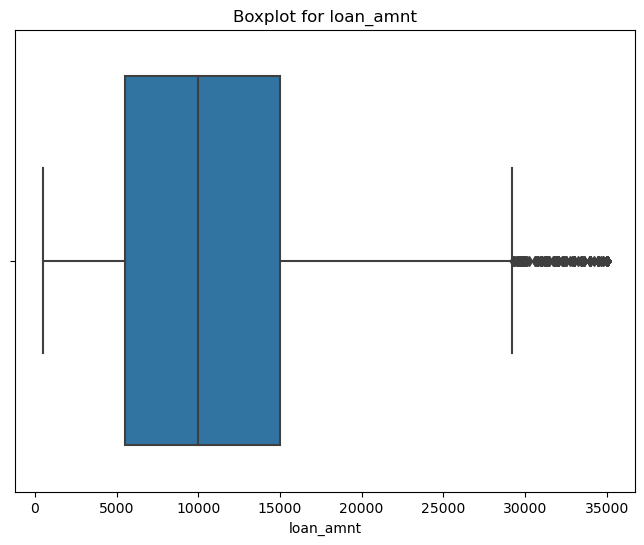

In [41]:
print("Before Outlier removal:")
box_plot_for_outliers(df,'loan_amnt')

In [42]:
df.shape

(36847, 20)

In [43]:
def remove_outliers(df,column_name):
    df_cleaned = df.copy()
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    print('lower bound',lower_bound)
    upper_bound = Q3 + 1.5 * IQR
    print('upper bound',upper_bound)
    df_cleaned = df_cleaned[(df_cleaned[column_name] >= lower_bound) & (df_cleaned[column_name] <= upper_bound)]
    return df_cleaned

In [44]:
cleaned_df=remove_outliers(df,'loan_amnt')
cleaned_df.shape

lower bound -8750.0
upper bound 29250.0


(35769, 20)

After Outlier removal:


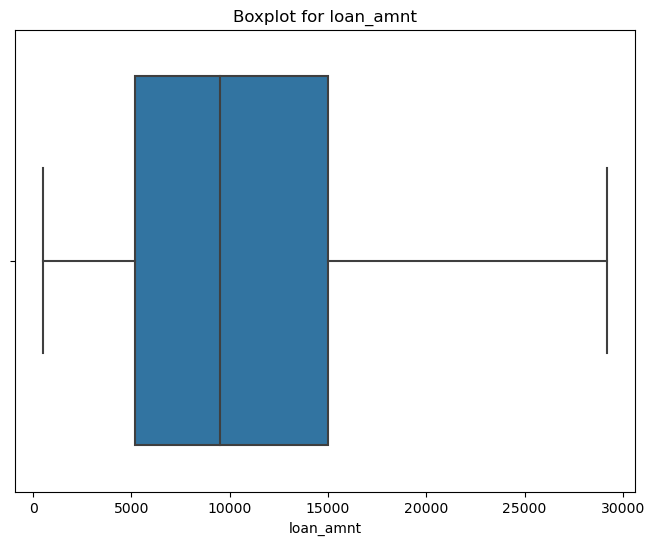

In [45]:
print("After Outlier removal:")
box_plot_for_outliers(cleaned_df,'loan_amnt')

Before Outlier removal:


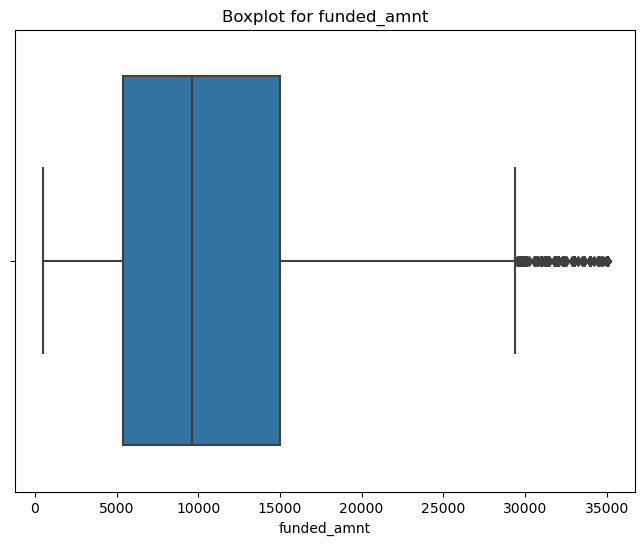

In [46]:
print("Before Outlier removal:")
box_plot_for_outliers(df,'funded_amnt')

In [47]:
cleaned_df=remove_outliers(cleaned_df,'funded_amnt')
cleaned_df.shape

lower bound -8975.0
upper bound 28425.0


(35739, 20)

After Outlier removal:


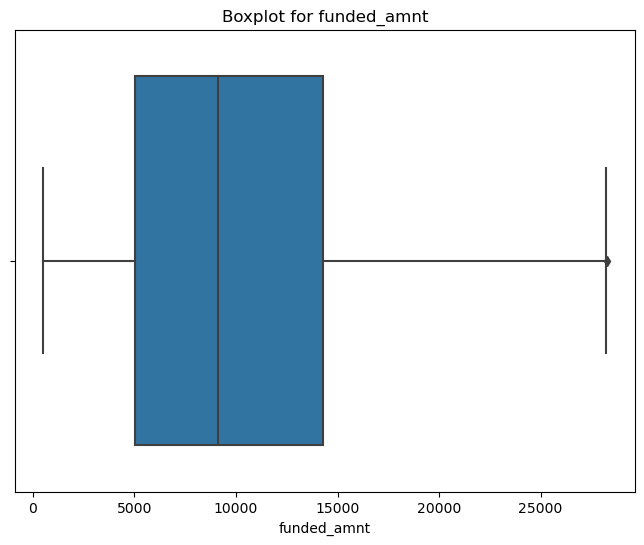

In [48]:
print("After Outlier removal:")
box_plot_for_outliers(cleaned_df,'funded_amnt')

Before Outlier removal:


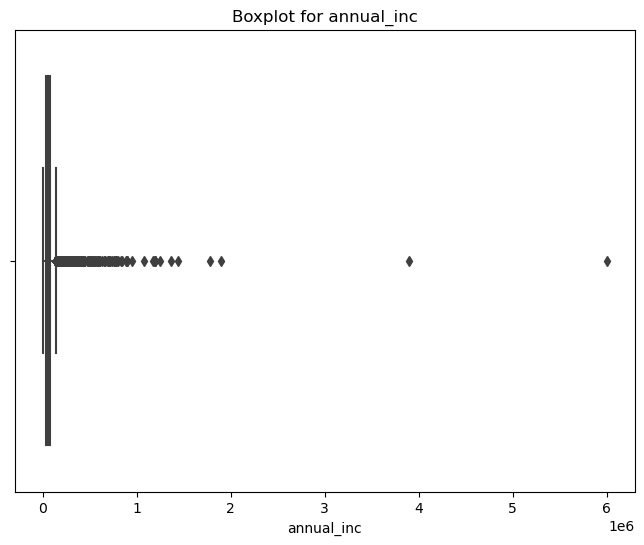

In [49]:
print("Before Outlier removal:")
box_plot_for_outliers(cleaned_df,'annual_inc')

In [50]:
cleaned_df=remove_outliers(cleaned_df,'annual_inc')
cleaned_df.shape

lower bound -19500.0
upper bound 139700.0


(33989, 20)

After Outlier removal:


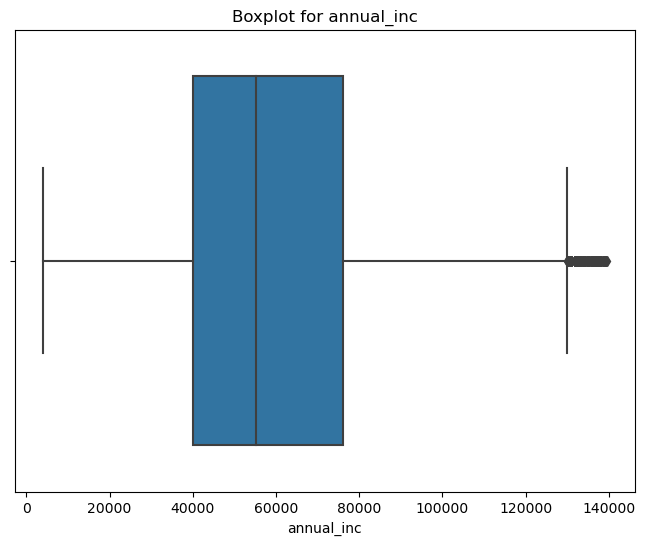

In [51]:
print("After Outlier removal:")
box_plot_for_outliers(cleaned_df,'annual_inc')

In [52]:
df=cleaned_df
df.shape

(33989, 20)

### Data Analysis
1. Derived Metrics
2. Univariate Analysis
3. Bivariate Analysis
4. Multivariate Analysis

#### Derived metrics
1. Derived metrics for Month and Year from column "issue_d".Create seperate columns for month and year 
2. Create new column loan_status_code with 0 and 1 values based on loan_status column where 0="Fully Paid" and 1="Charged off"
3. Creating different groups for interest rate
4. Creating different groups for annual_inc

In [53]:
#Derived metrics analysis on column "issue_d"
df["issue_y"]=df.issue_d.dt.year
df["issue_m"]=df.issue_d.dt.month
df[["issue_d","issue_m","issue_y"]].head()

,issue_d,issue_m,issue_y
0,2011-12-01,12,2011
1,2011-12-01,12,2011
2,2011-12-01,12,2011
3,2011-12-01,12,2011
5,2011-12-01,12,2011


In [54]:
#Create new column loan_status_code with 0 and 1 values based on loan_status column where 1="Charged Off" and 0="Fully Paid"
loan_status_map = {'Charged Off':1,'Fully Paid':0 }
df["loan_status_code"] = df["loan_status"].map(loan_status_map)
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_income_ratio,issue_y,issue_m,loan_status_code
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10+ years,...,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,0.208333,2011,12,0
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,...,2011-12-01,Charged Off,car,GA,1.00,0,0.083333,2011,12,1
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10+ years,...,2011-12-01,Fully Paid,small_business,IL,8.72,0,0.195886,2011,12,0
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,2011-12-01,Fully Paid,other,CA,20.00,0,0.203252,2011,12,0
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,2011-12-01,Fully Paid,wedding,AZ,11.20,0,0.138889,2011,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100,36,10.28,155.52,C,C1,E.E. Wine Inc,1 year,...,2007-11-01,Fully Paid,debt_consolidation,VA,7.51,1,0.137143,2007,11,0
39573,7000,7000,1000,36,10.59,227.82,C,C2,Unknown,3 years,...,2007-11-01,Fully Paid,debt_consolidation,AZ,8.50,1,0.110236,2007,11,0
39623,9000,9000,700,36,12.49,301.04,D,D3,Maximus,8 years,...,2007-10-01,Charged Off,debt_consolidation,MD,5.08,1,0.230769,2007,10,1
39666,15450,15450,600,36,11.22,507.46,C,C4,ARIN,2 years,...,2007-08-01,Charged Off,debt_consolidation,VA,13.50,1,0.386250,2007,8,1


In [55]:
#Creating different groups for interest rate
#Int_rate is between 5% to 25%, grouping them accordingly
bins = [5, 9, 13, 17, 21, 25]
labels = ['5%-9%','9%-13%','13%-17%','17%-21%','21%-25%']
df['int_rate_group'] = pd.cut(df['int_rate'], bins=bins,
                               labels=labels)

df['int_rate_group'].value_counts()


int_rate_group
9%-13%     12498
13%-17%     9929
5%-9%       8783
17%-21%     2553
21%-25%      226
Name: count, dtype: int64

In [56]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,loan_income_ratio,issue_y,issue_m,loan_status_code,int_rate_group
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10+ years,...,Fully Paid,credit_card,AZ,27.65,0,0.208333,2011,12,0,9%-13%
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,...,Charged Off,car,GA,1.00,0,0.083333,2011,12,1,13%-17%
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10+ years,...,Fully Paid,small_business,IL,8.72,0,0.195886,2011,12,0,13%-17%
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,Fully Paid,other,CA,20.00,0,0.203252,2011,12,0,13%-17%
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,Fully Paid,wedding,AZ,11.20,0,0.138889,2011,12,0,5%-9%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100,36,10.28,155.52,C,C1,E.E. Wine Inc,1 year,...,Fully Paid,debt_consolidation,VA,7.51,1,0.137143,2007,11,0,9%-13%
39573,7000,7000,1000,36,10.59,227.82,C,C2,Unknown,3 years,...,Fully Paid,debt_consolidation,AZ,8.50,1,0.110236,2007,11,0,9%-13%
39623,9000,9000,700,36,12.49,301.04,D,D3,Maximus,8 years,...,Charged Off,debt_consolidation,MD,5.08,1,0.230769,2007,10,1,9%-13%
39666,15450,15450,600,36,11.22,507.46,C,C4,ARIN,2 years,...,Charged Off,debt_consolidation,VA,13.50,1,0.386250,2007,8,1,9%-13%


In [57]:
#Creating groups for annual_inc
bins = [ 1000, 25000, 50000, 100000,150000,234000]
labels = ['1k-25k','25k-50k','50k-100k','100k-150k','150k-250k']

df['annual_inc_group'] = pd.cut(df['annual_inc'], bins=bins,
                               labels=labels)
df['annual_inc_group'].value_counts()

annual_inc_group
50k-100k     16610
25k-50k      12154
100k-150k     3026
1k-25k        2199
150k-250k        0
Name: count, dtype: int64

### Univariate Analysis

**Categorical Data:**
- Ordered Categorical Data: Grade,Sub grade,Term (36 / 60 months),Employment length,Loan issue year,Loan issue month

- Unordered Categorical Data: State,Loan purpose,Home Ownership,Loan status

**Quantitative:** Interest rate group,Annual income group,Loan amount,Funded amount,dti,loan_income_ratio

In [58]:
def univariate_analysis_categorical_ordered(df):
    ordered_categorical_vars = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m']
    for column in ordered_categorical_vars:
        plt.figure(figsize=(16, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.xticks(rotation=90)
        plt.show()

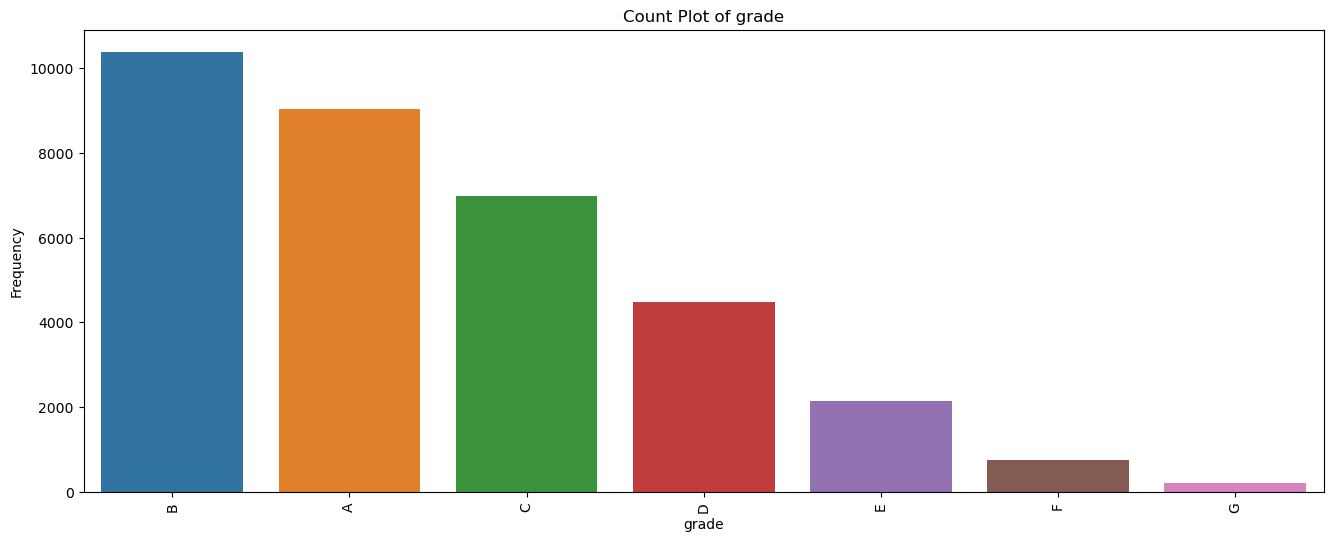

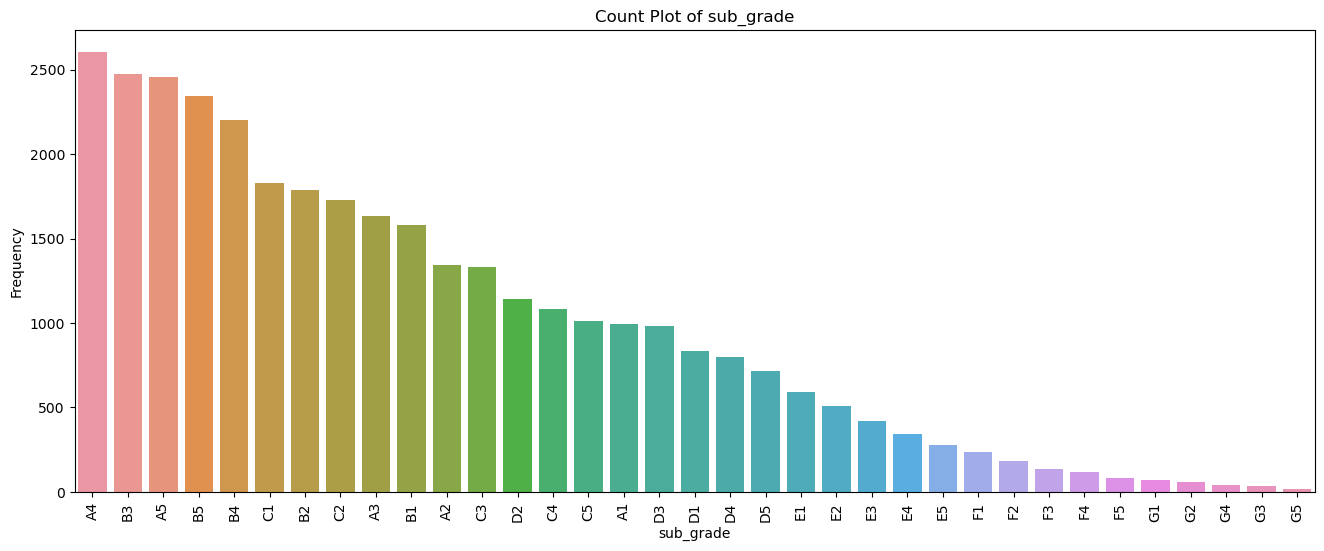

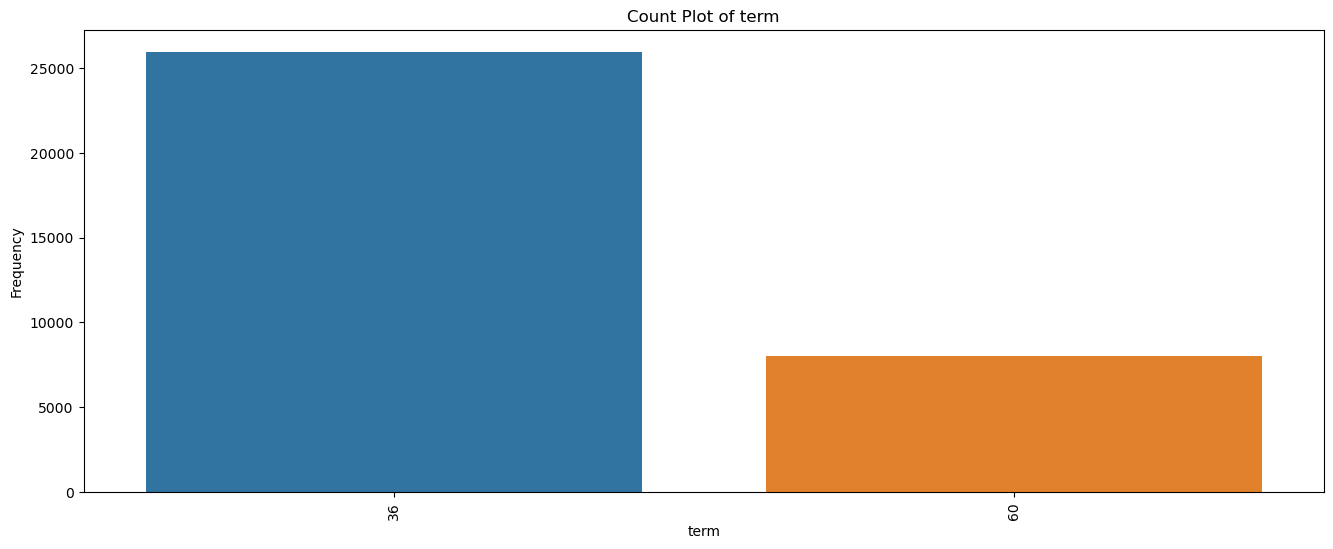

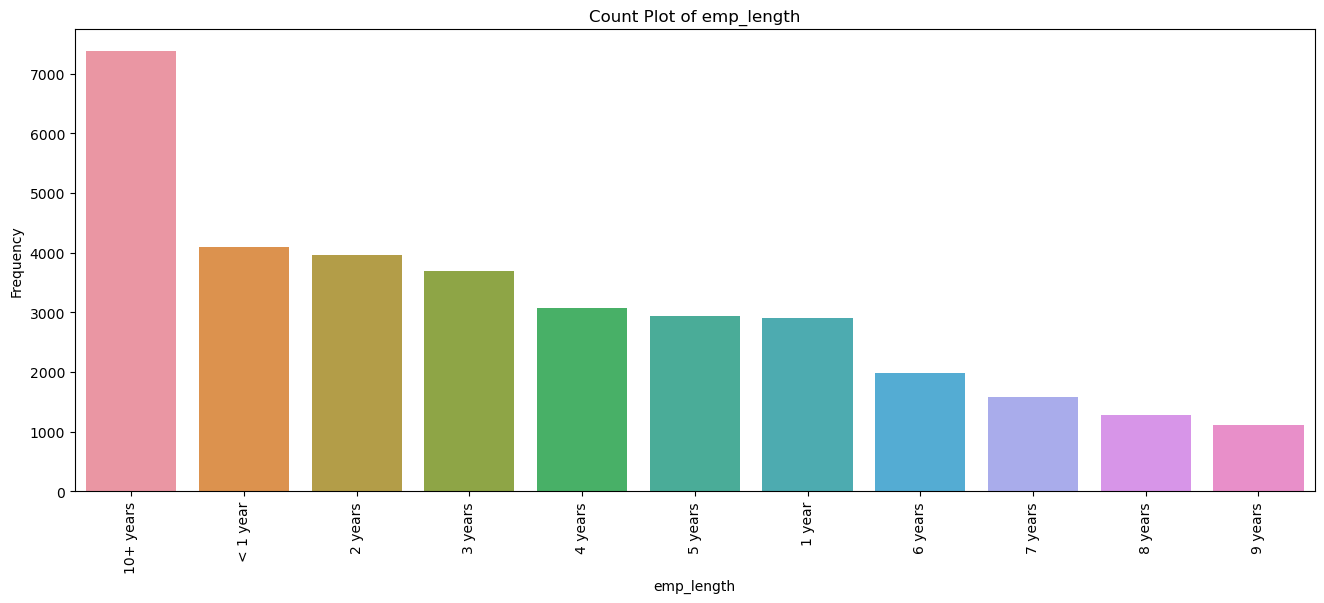

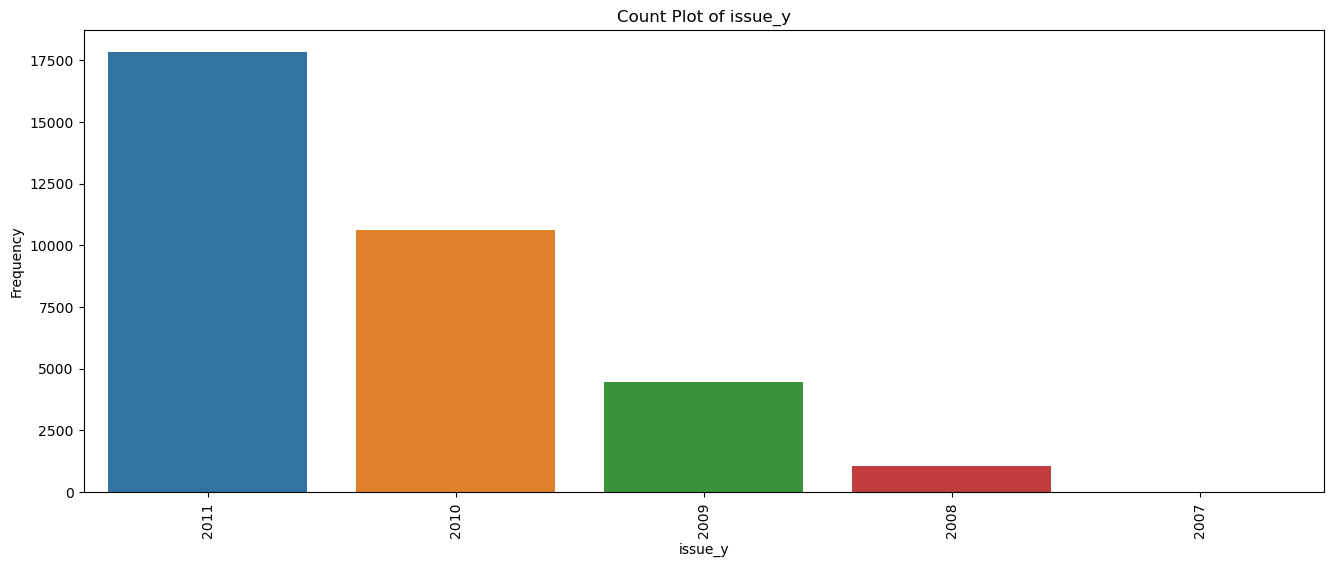

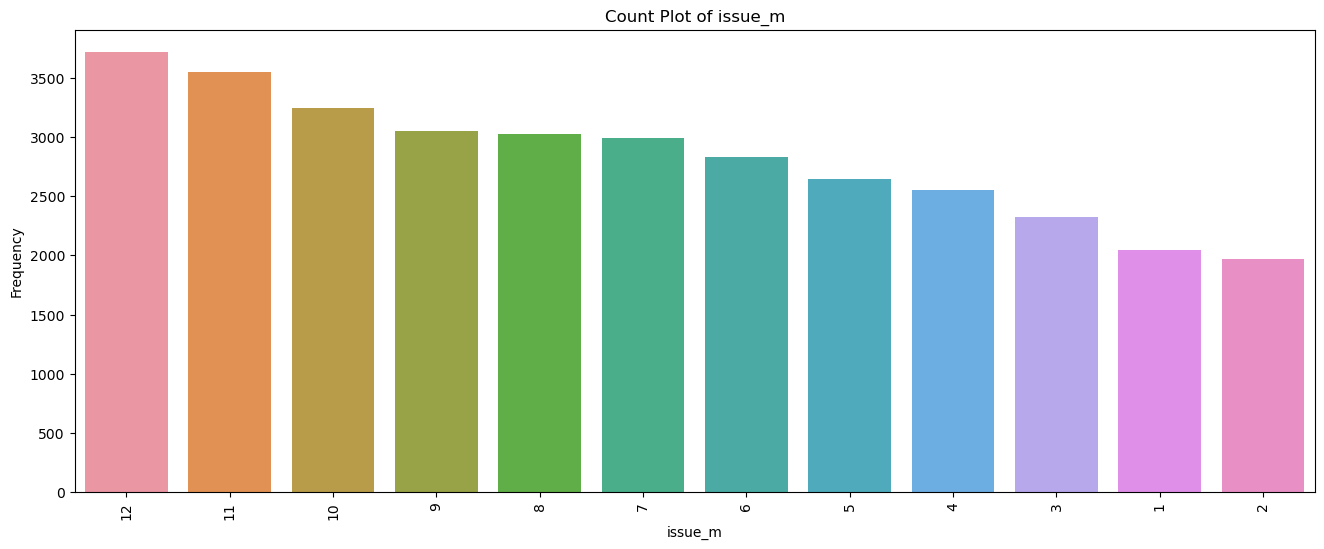

In [59]:
# Univariate analysis for ordered categorical variable
univariate_analysis_categorical_ordered(df)

In [60]:
def univariate_analysis_categorical_unordered(df):
    unordered_categorical_vars = ['addr_state', 'purpose', 'home_ownership', 'loan_status']
    for column in unordered_categorical_vars:
        plt.figure(figsize=(16, 6))
        sns.countplot(data=df, x=column, order=df[column].value_counts().index)
        plt.title(f'Count Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=90)
        plt.grid(False)
        plt.show()

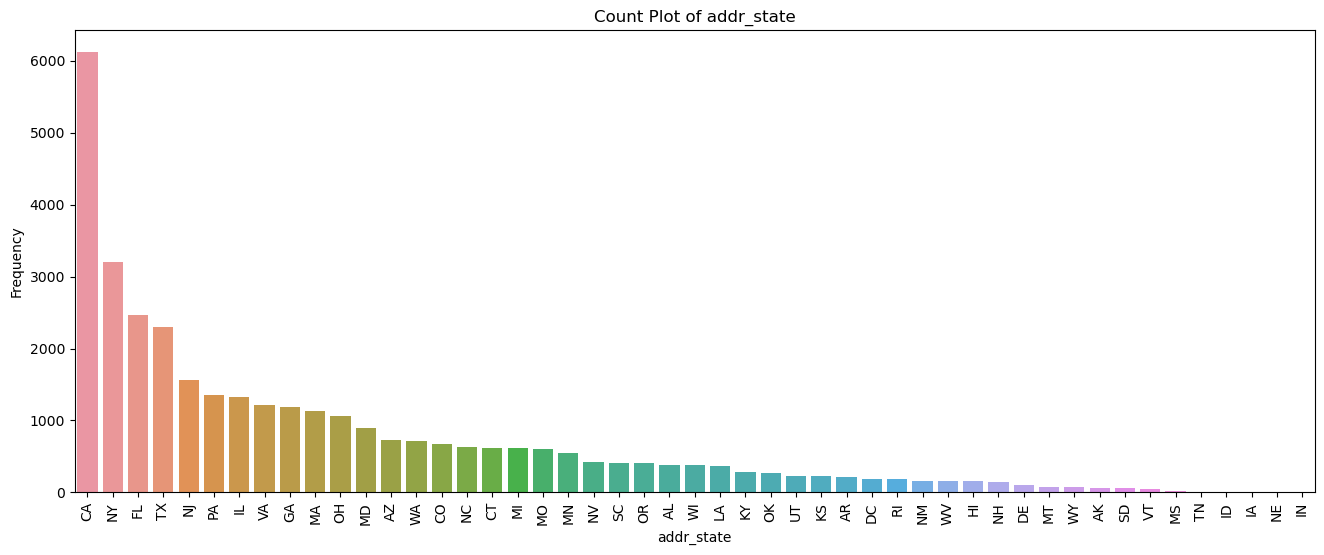

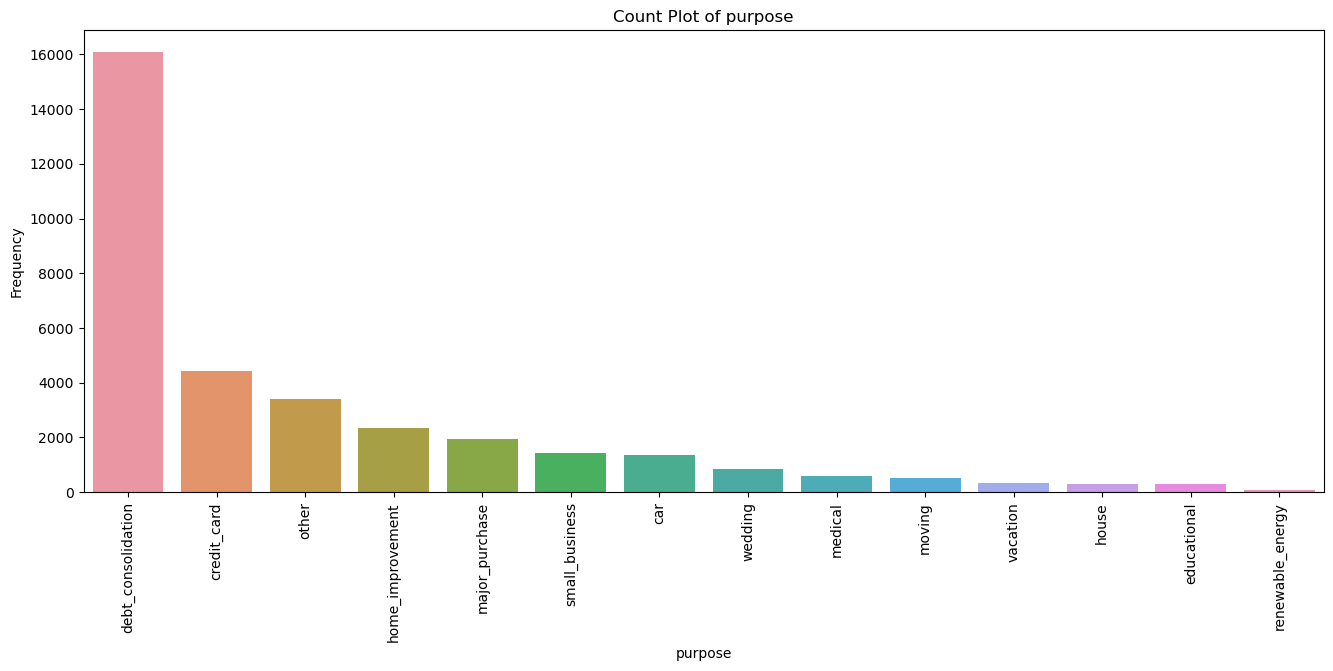

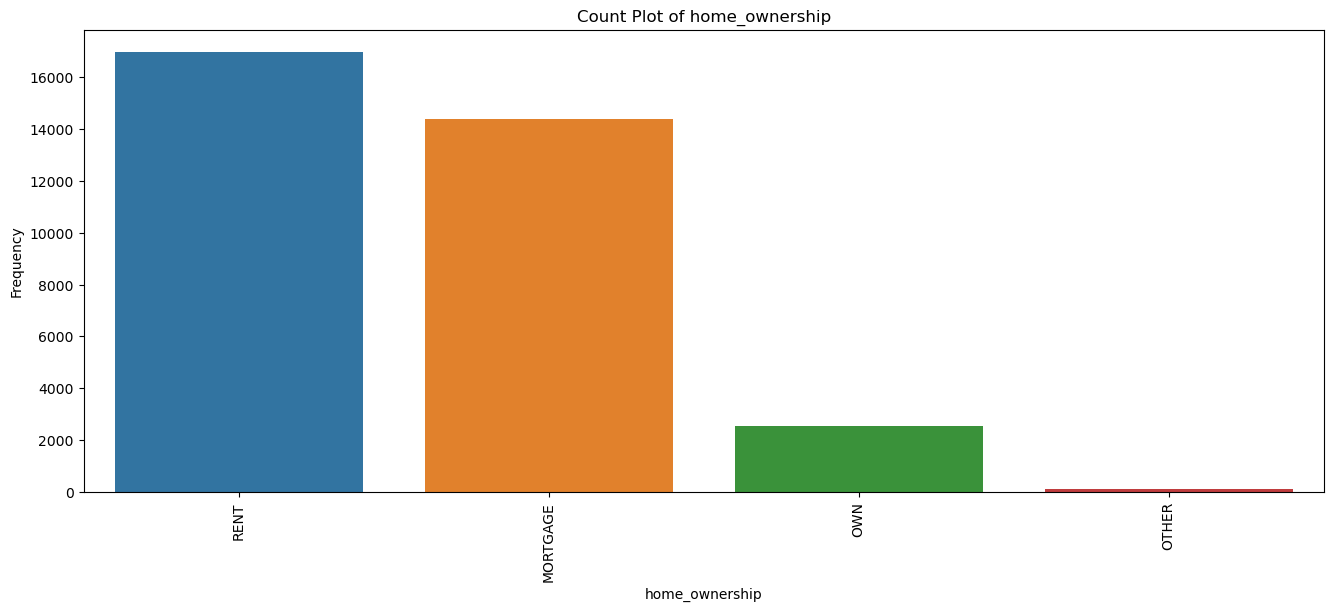

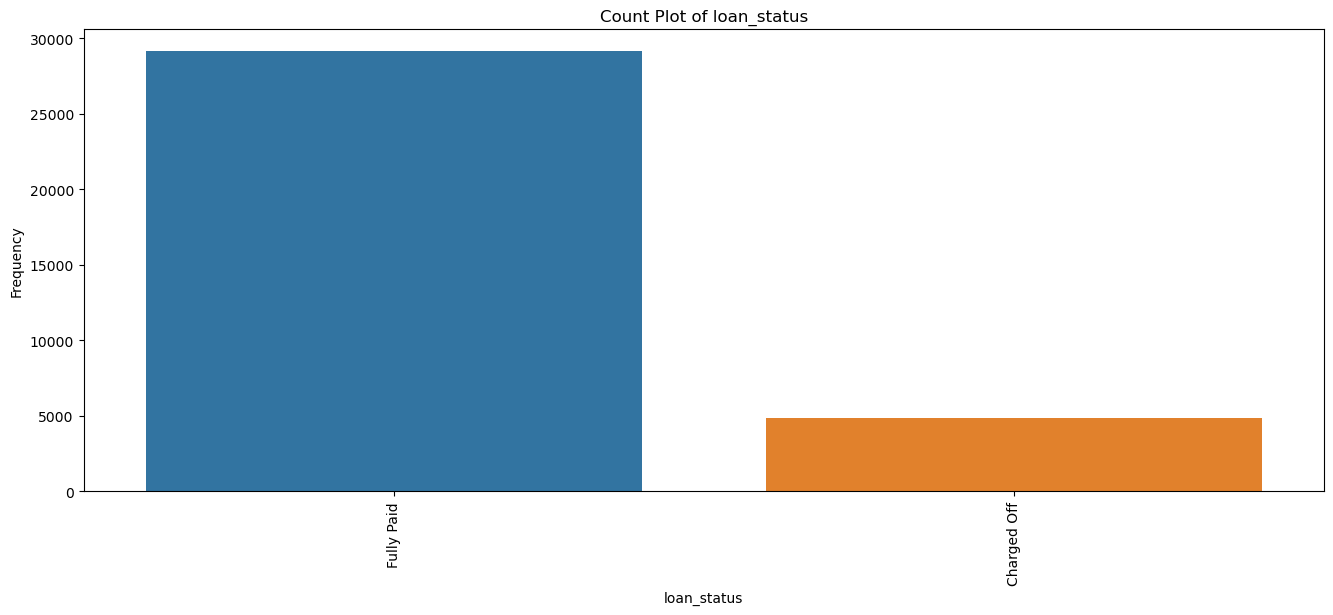

In [61]:
# Univariate analysis for unordered categorical variable
univariate_analysis_categorical_unordered(df)

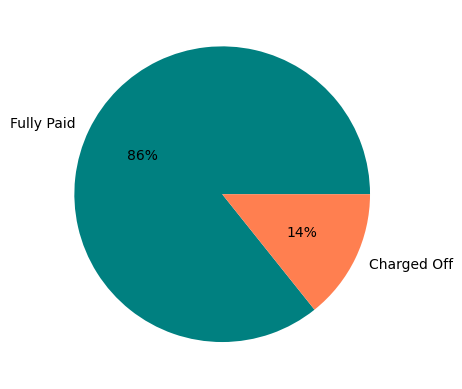

In [62]:
#Plot pie chart for loan_status
data = df.loan_status.value_counts()
labels = ['Fully Paid','Charged Off']
colors = ['Teal', 'Coral']
plt.pie(data, labels=labels, colors = colors, autopct = '%0.0f%%')

plt.show()

In [63]:
def univariate_analysis_quantitative(df):
    quantitative_vars = ['int_rate', 'annual_inc', 'loan_amnt', 'funded_amnt','installment','loan_income_ratio','dti']
    for column in quantitative_vars:
        plt.figure(figsize=(8, 6))
        plt.subplot(1,2,1)
        plt.hist(df[column], bins=20)
        plt.grid(False)
        plt.title(f'Histogram of {column}')
        plt.subplot(1,2,2)
        sns.boxplot(data=df[column], color='#388E3C')
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()

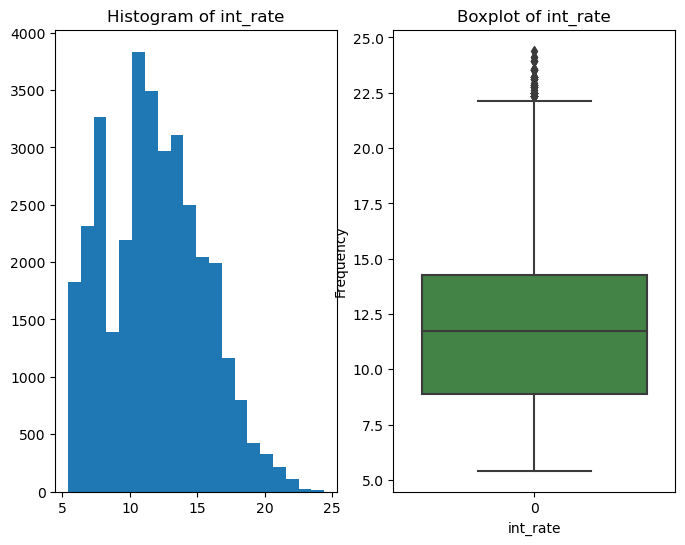

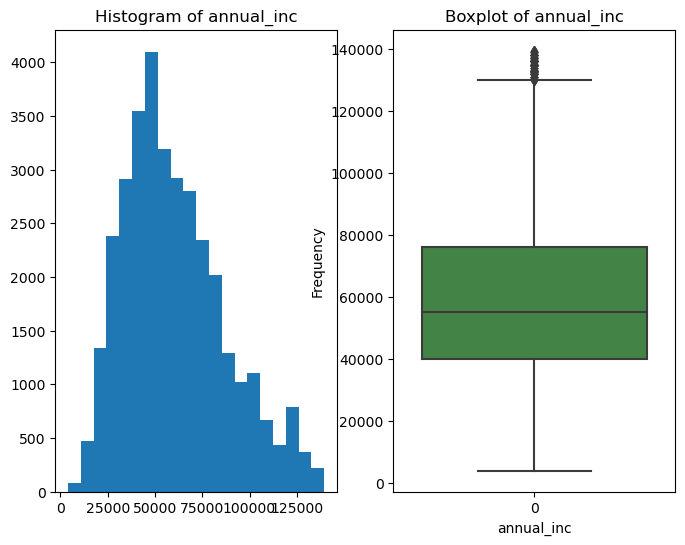

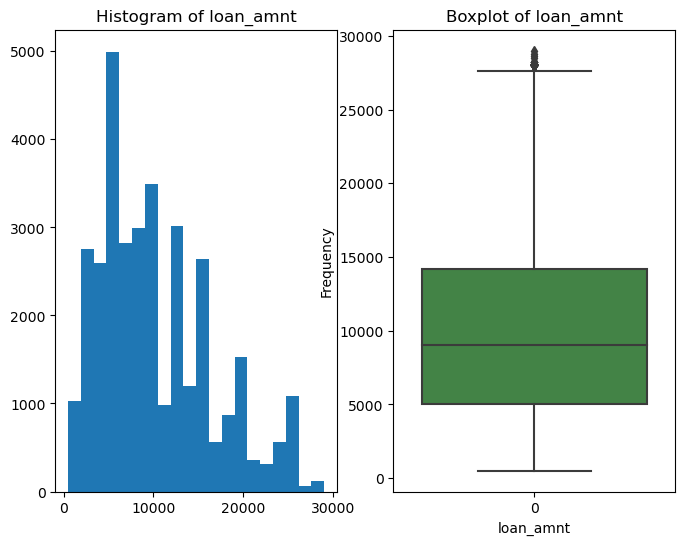

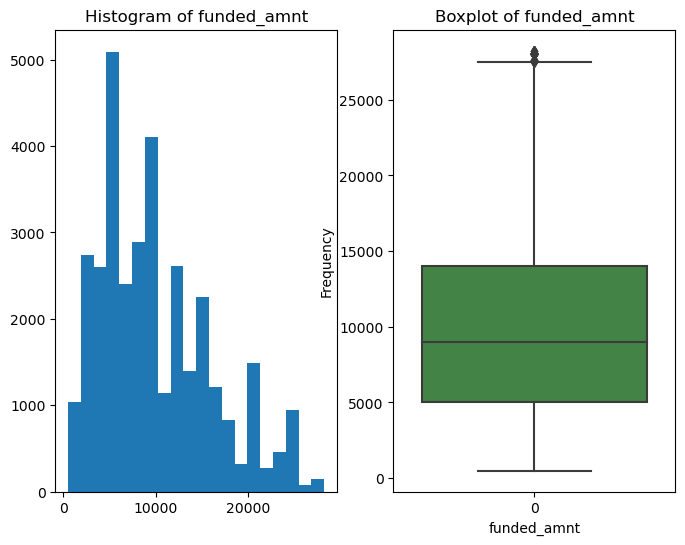

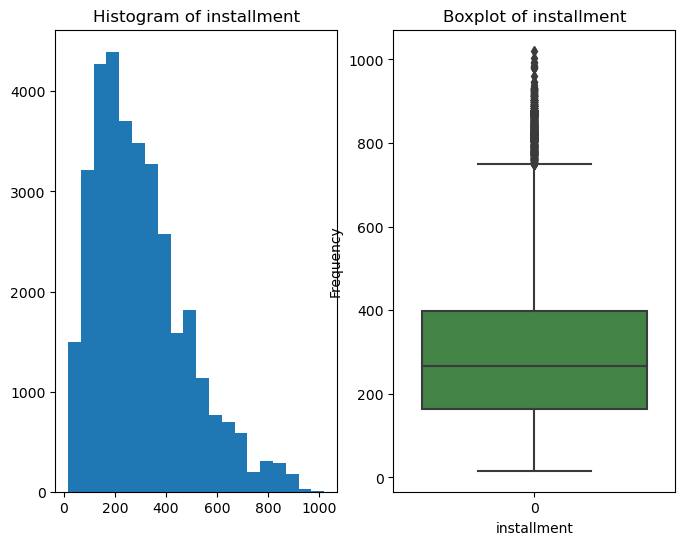

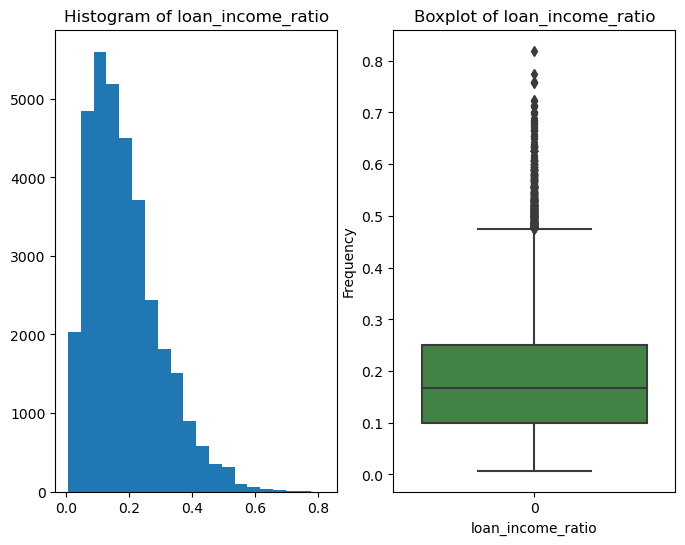

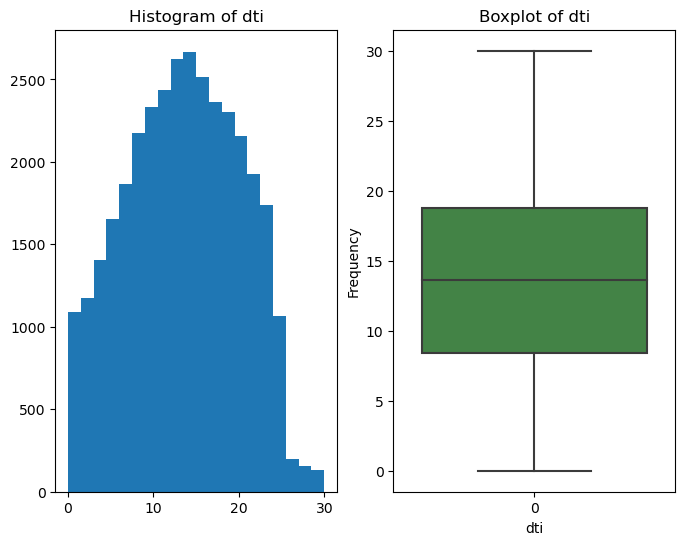

In [64]:
#univariate analysis for quantitative variables
univariate_analysis_quantitative(df)

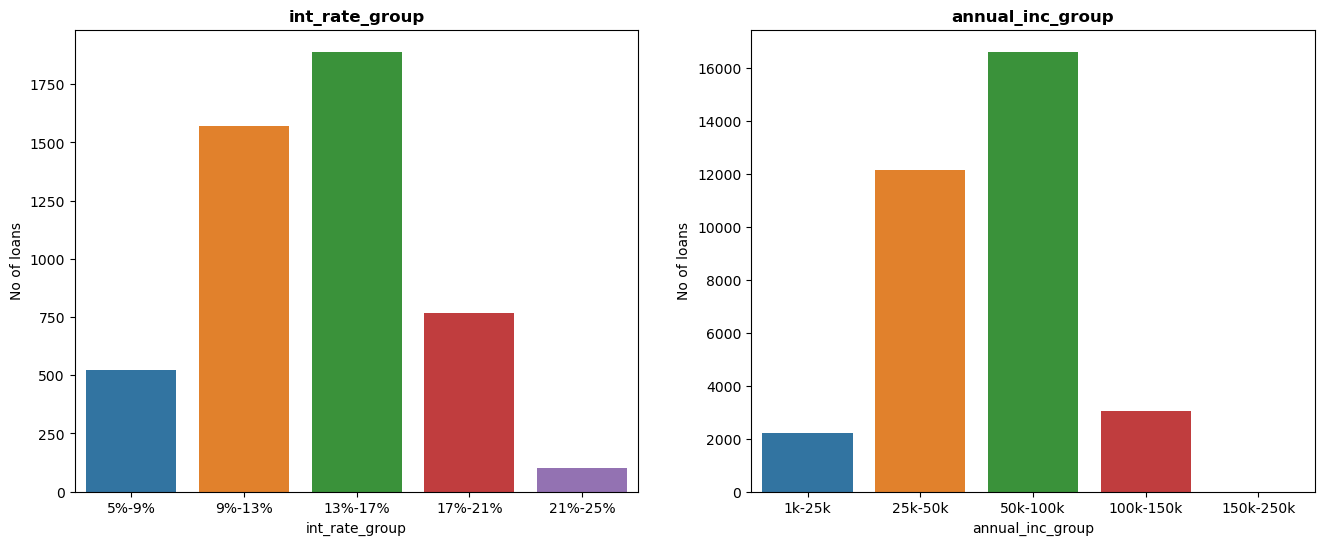

In [65]:
#Segemented univariate analysis
#Countplot of int_rate_group and annual_inc_group
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
sns.countplot(x='int_rate_group', data=df[df['loan_status']=='Charged Off'])
plt.xlabel('int_rate_group')
plt.ylabel('No of loans')
plt.grid(False)
plt.title('int_rate_group', weight='bold')
plt.subplot(1,2,2)
sns.countplot(x='annual_inc_group', data=df)
plt.xlabel('annual_inc_group')
plt.ylabel('No of loans')
plt.grid(False)
plt.title('annual_inc_group', weight='bold')
plt.show()

### Summary of univariate analaysis
1. Grade A and B are given more loans compared to other grades
2. Grade A4, B3, A5, B5, B4 are given more loans compared to other grades
3. 36 months loans are issued more compared to 60 months loans.
4. Employees with 10 years and above are given loan compared with lesser experience.
5. Maximum loans were taken in the year 2011. The trend is increasing with the increase in the year,there is increasing trend in number of loans with increase in the months. Maximum loans were given in the month of Oct, Nov,    Dec.
5. 14 % of the total loans are charged off
6. States CA, NY, FL and TX are the states for which maximum loans have been issued
7. Maximum loans are given for debt consolidation, paying off Credit card and 'other' reasons
8. Education and renewable energy is the least category where loans have been given
9. People who are in Rented house or Mortgate have availed maximum of the loans
10. Funded amount is ranging from 5000 to 15000 USD
11. Installment amount is ranging from 200 to 400 USD
12. Interest rate range 13 to 17% is the range where maximum default loans have been issued.
13. 21 - 25% is the range where minimum loans have been issued
14. The annual income group where 50k-100k have maximum loans issued and 1k-25k have minimum loans issued.

In [66]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,addr_state,dti,pub_rec_bankruptcies,loan_income_ratio,issue_y,issue_m,loan_status_code,int_rate_group,annual_inc_group
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10+ years,...,credit_card,AZ,27.65,0,0.208333,2011,12,0,9%-13%,1k-25k
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,...,car,GA,1.00,0,0.083333,2011,12,1,13%-17%,25k-50k
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10+ years,...,small_business,IL,8.72,0,0.195886,2011,12,0,13%-17%,1k-25k
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,other,CA,20.00,0,0.203252,2011,12,0,13%-17%,25k-50k
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,wedding,AZ,11.20,0,0.138889,2011,12,0,5%-9%,25k-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100,36,10.28,155.52,C,C1,E.E. Wine Inc,1 year,...,debt_consolidation,VA,7.51,1,0.137143,2007,11,0,9%-13%,25k-50k
39573,7000,7000,1000,36,10.59,227.82,C,C2,Unknown,3 years,...,debt_consolidation,AZ,8.50,1,0.110236,2007,11,0,9%-13%,50k-100k
39623,9000,9000,700,36,12.49,301.04,D,D3,Maximus,8 years,...,debt_consolidation,MD,5.08,1,0.230769,2007,10,1,9%-13%,25k-50k
39666,15450,15450,600,36,11.22,507.46,C,C4,ARIN,2 years,...,debt_consolidation,VA,13.50,1,0.386250,2007,8,1,9%-13%,25k-50k


### Bivariate Analysis

In [67]:
def bivariate_analysis_categorical(df):
    categorical_vars = ['grade', 'sub_grade', 'term', 'emp_length', 'issue_y', 'issue_m', 
                        'addr_state', 'purpose', 'home_ownership', 'int_rate_group', 'annual_inc_group','verification_status']
    loan_status_order = ['Charged Off']

    for column in categorical_vars:
        plt.figure(figsize=(10, 6))
        sns.countplot(data=df[df['loan_status']=='Charged Off'], x=column, hue='loan_status', order=df[column].value_counts().index, hue_order=loan_status_order)
        plt.title(f'Count Plot of {column} by Loan Status')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=90)
        plt.grid(False)
        plt.legend(title='Loan Status')
        plt.show()


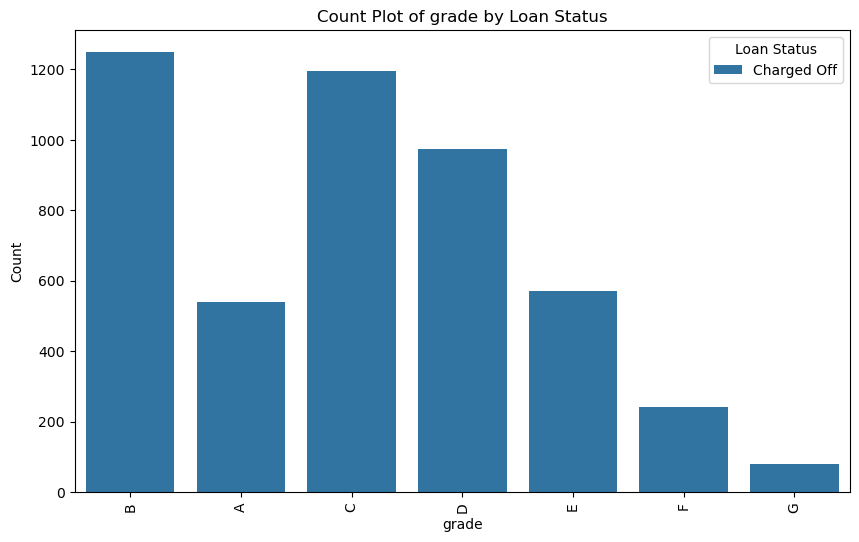

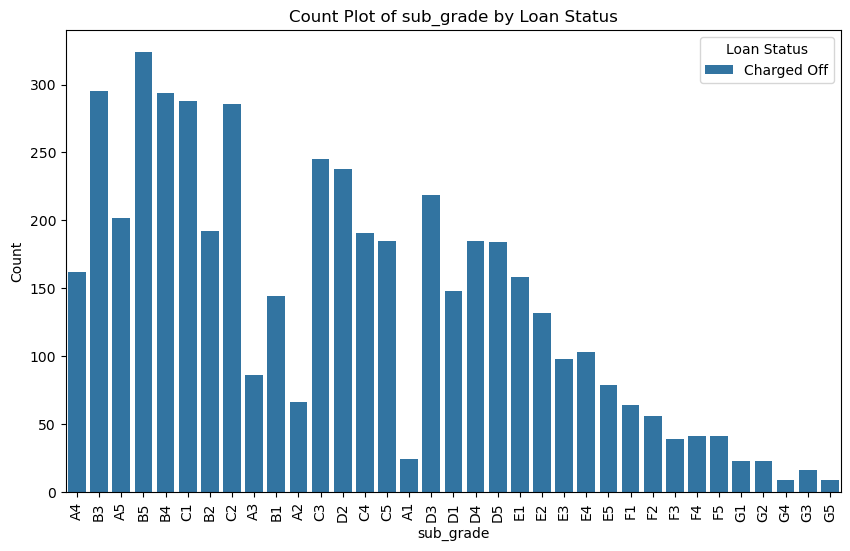

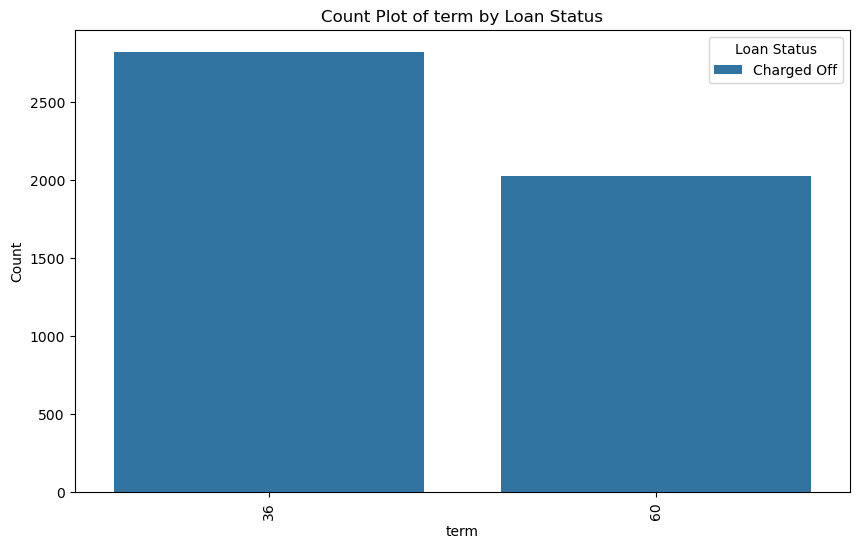

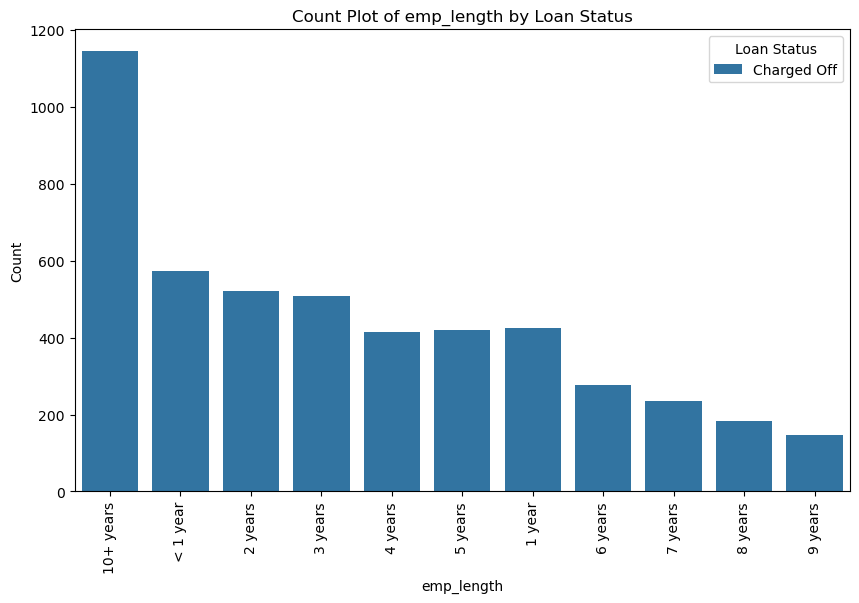

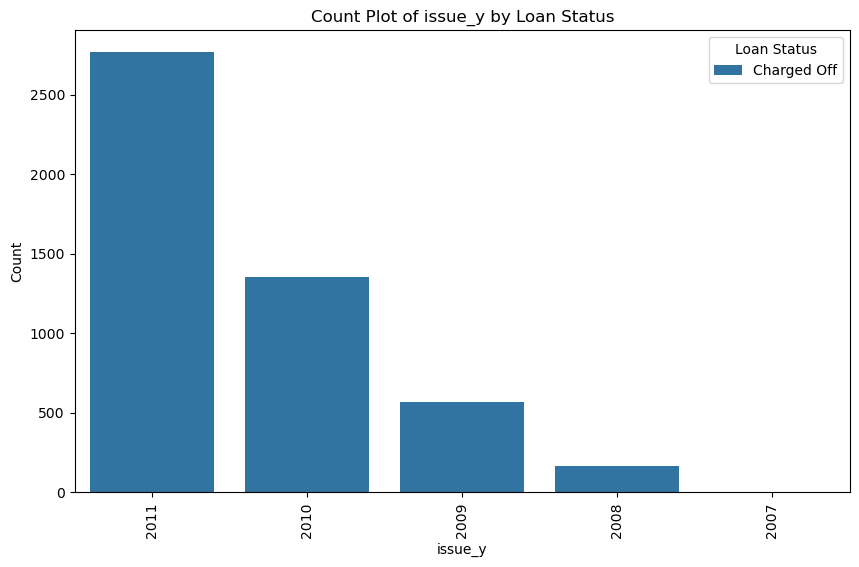

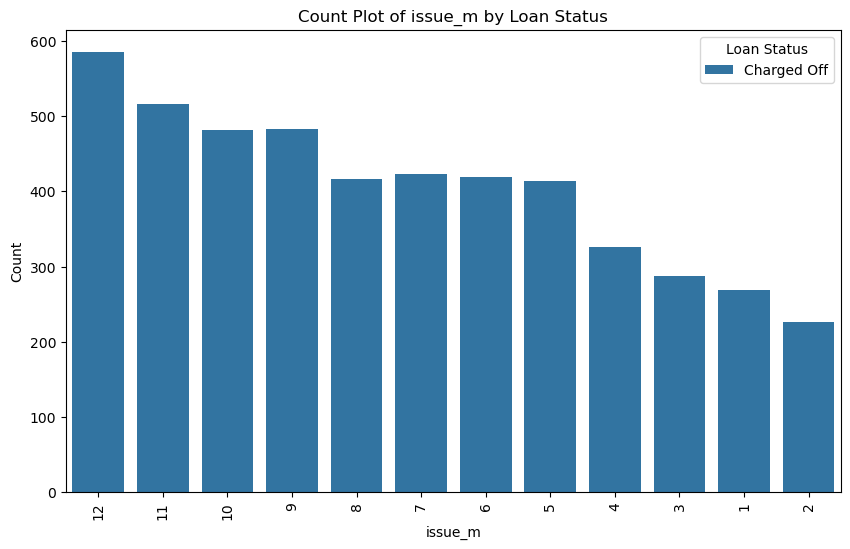

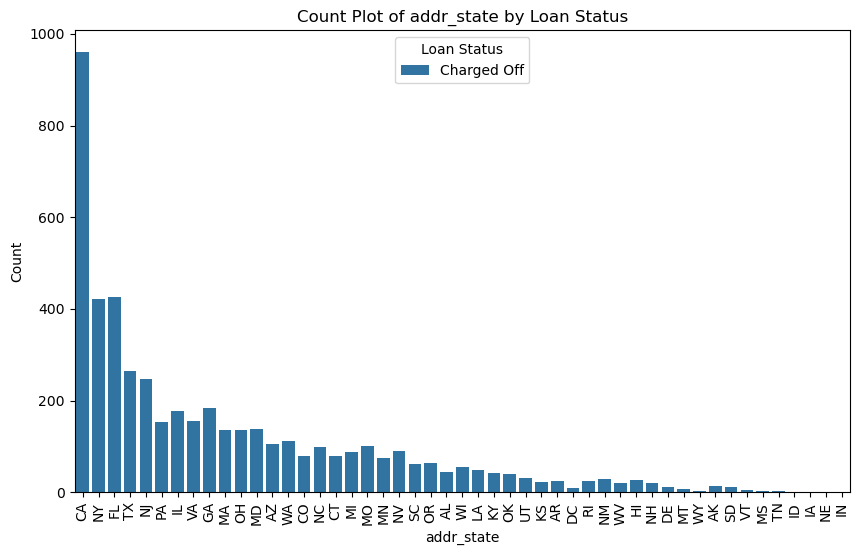

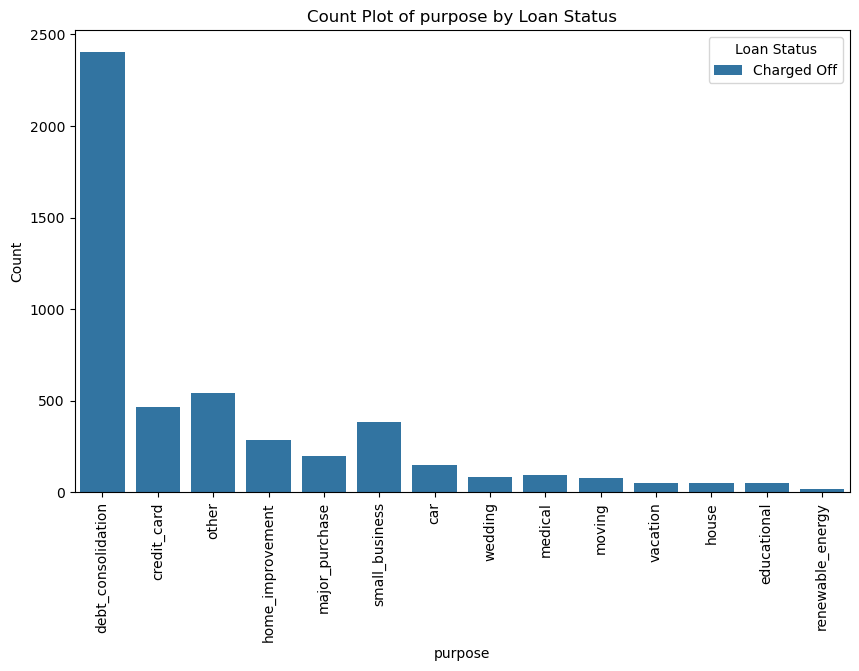

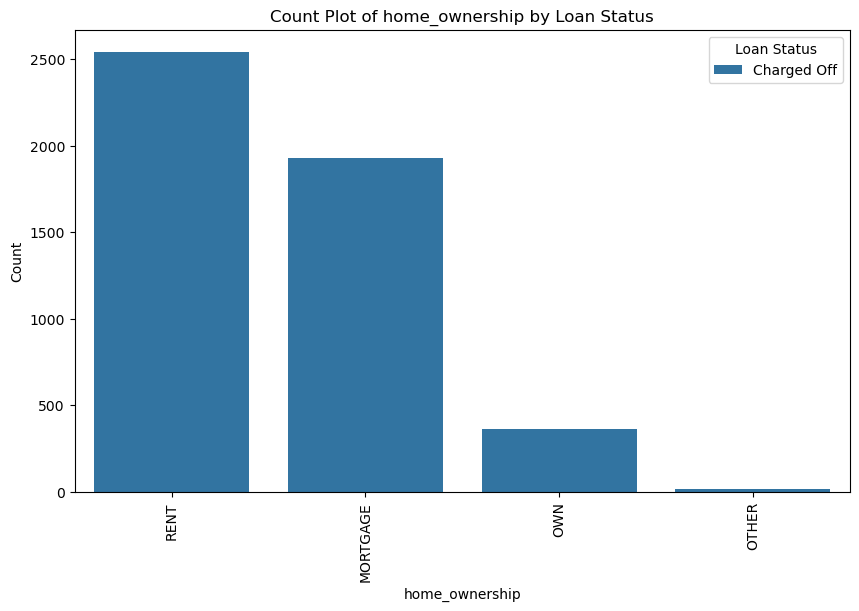

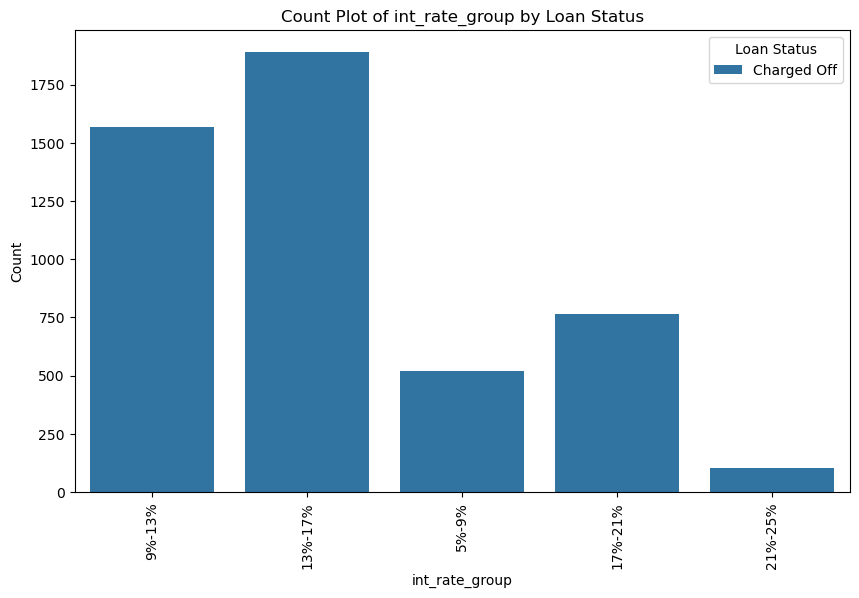

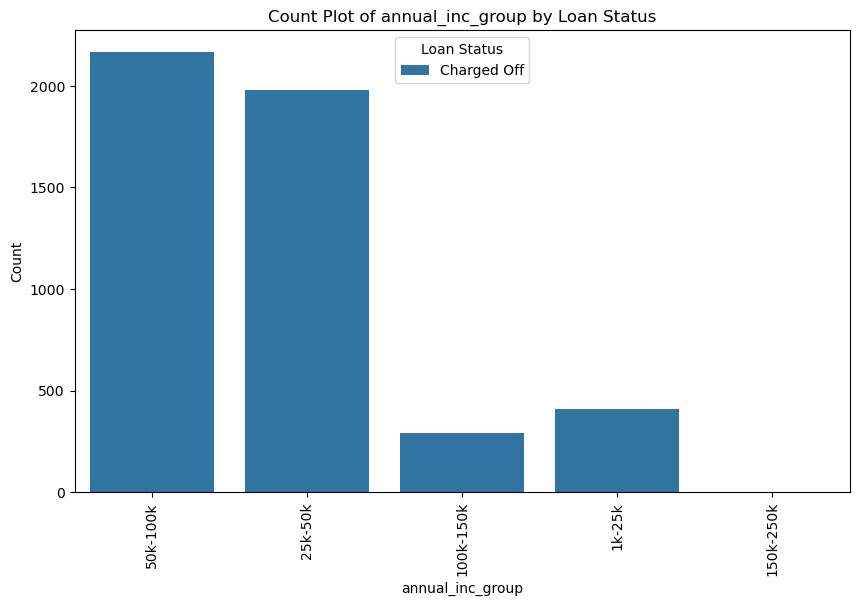

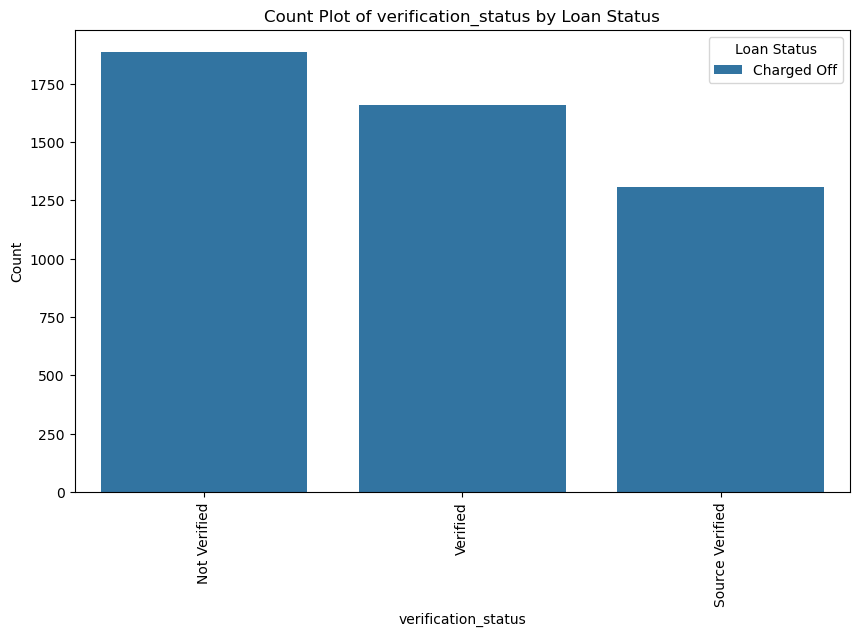

In [68]:
bivariate_analysis_categorical(df)

In [69]:
def bivariate_analysis_quantitative(df):
    quantitative_vars = ['loan_amnt', 'funded_amnt','installment','dti','loan_income_ratio']
    loan_status_order = ['Charged Off']

    for column in quantitative_vars:
        plt.figure(figsize=(10, 6))
        sns.boxplot(data=df[df['loan_status']=='Charged Off'], x='loan_status', y=column, order=loan_status_order)
        plt.title(f'Box Plot of {column} by Loan Status')
        plt.xlabel('Loan Status')
        plt.ylabel(column)
        plt.grid(False)
        plt.show()


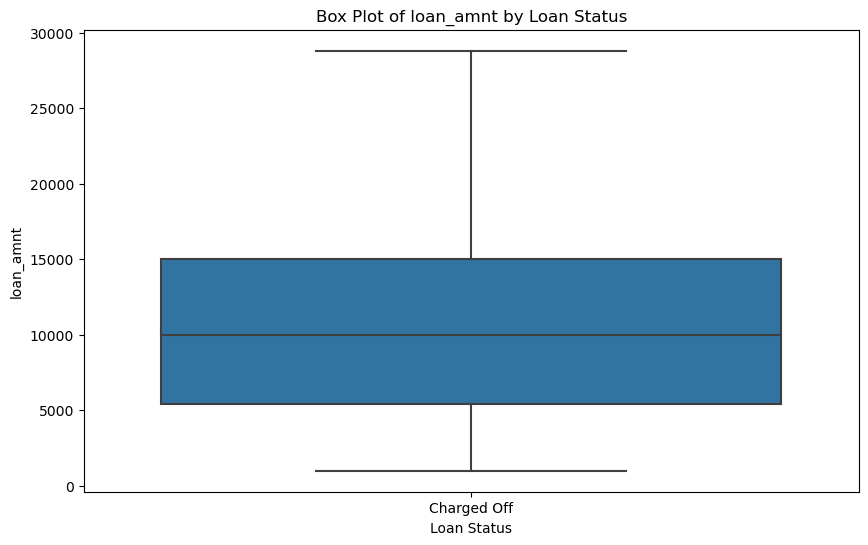

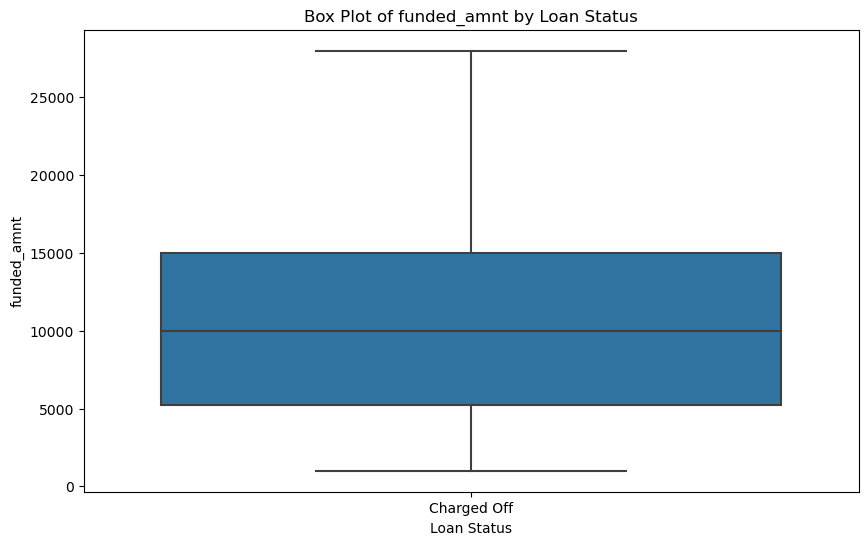

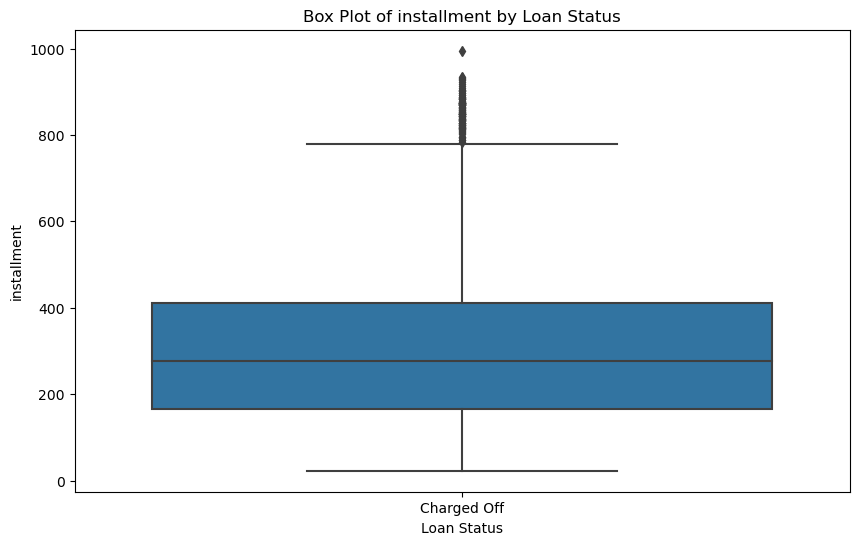

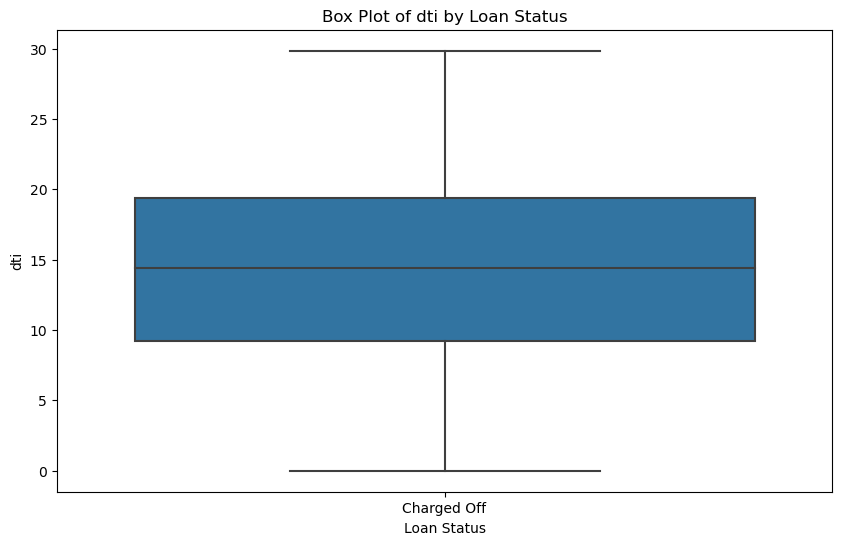

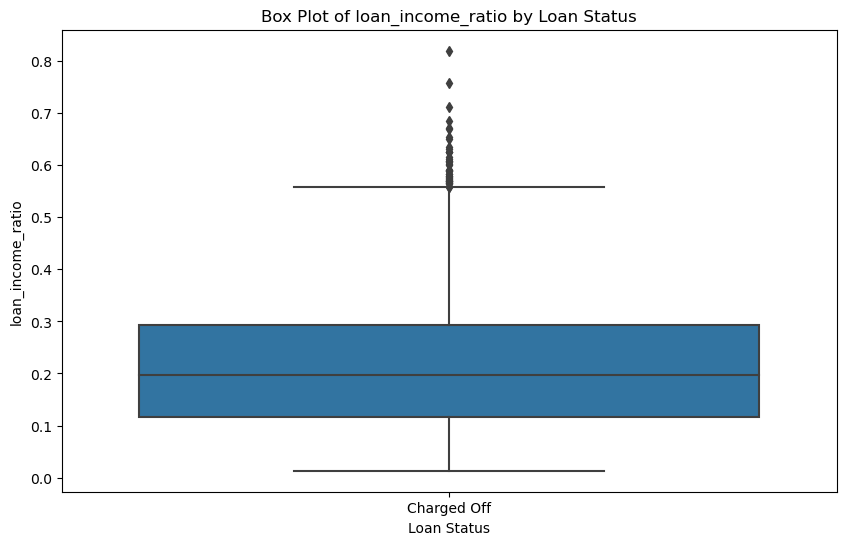

In [70]:
bivariate_analysis_quantitative(df)

In [71]:
df

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,purpose,addr_state,dti,pub_rec_bankruptcies,loan_income_ratio,issue_y,issue_m,loan_status_code,int_rate_group,annual_inc_group
0,5000,5000,4975,36,10.65,162.87,B,B2,Unknown,10+ years,...,credit_card,AZ,27.65,0,0.208333,2011,12,0,9%-13%,1k-25k
1,2500,2500,2500,60,15.27,59.83,C,C4,Ryder,< 1 year,...,car,GA,1.00,0,0.083333,2011,12,1,13%-17%,25k-50k
2,2400,2400,2400,36,15.96,84.33,C,C5,Unknown,10+ years,...,small_business,IL,8.72,0,0.195886,2011,12,0,13%-17%,1k-25k
3,10000,10000,10000,36,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,other,CA,20.00,0,0.203252,2011,12,0,13%-17%,25k-50k
5,5000,5000,5000,36,7.90,156.46,A,A4,Veolia Transportaton,3 years,...,wedding,AZ,11.20,0,0.138889,2011,12,0,5%-9%,25k-50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39562,4800,4800,1100,36,10.28,155.52,C,C1,E.E. Wine Inc,1 year,...,debt_consolidation,VA,7.51,1,0.137143,2007,11,0,9%-13%,25k-50k
39573,7000,7000,1000,36,10.59,227.82,C,C2,Unknown,3 years,...,debt_consolidation,AZ,8.50,1,0.110236,2007,11,0,9%-13%,50k-100k
39623,9000,9000,700,36,12.49,301.04,D,D3,Maximus,8 years,...,debt_consolidation,MD,5.08,1,0.230769,2007,10,1,9%-13%,25k-50k
39666,15450,15450,600,36,11.22,507.46,C,C4,ARIN,2 years,...,debt_consolidation,VA,13.50,1,0.386250,2007,8,1,9%-13%,25k-50k


### Observations of Bivariate analysis
1. Based on the counts, Grade B, C and D are top three in Charged Off
2. Based on the counts, Grade B3,B4,B5, C1,C2, D3,D4,C3,D2 top sub grades in Charged Off
3. 36 month loans default is more compared to 60 month loans.
4. Category 10+ years have more loans default compared to other experiences and they are the maximum defaulters.
5. Plot of loan issue year shows maximum loans were taken in the year 2011. Also high loans are being Charged Off in 2011.
6. Plot of the loan issue month shows maximum loans were given in the month of Oct, Nov, Dec.Also high loans are being Charged Off for the loans issued in Sep,Oct,Nov,Dec.
7. Loans with purpose debt consolidation, credit card and home improvement,small business categories have failed to pay the loan compared with education / renewable energy
8. Borrowers from state CA have shown maximum tendency to default.
9. People who are in Rent or Mortage have failed to pay the loan compared with people in Own house
10. The amount of Not verified loans which are Charged Off (default) is more compared to Verified,Source Verified.
11. Interest Rate with 13-17% have more loans default.
12. People who have annual income 50K-100k are more likely to loan default.

### Multivariate Analysis

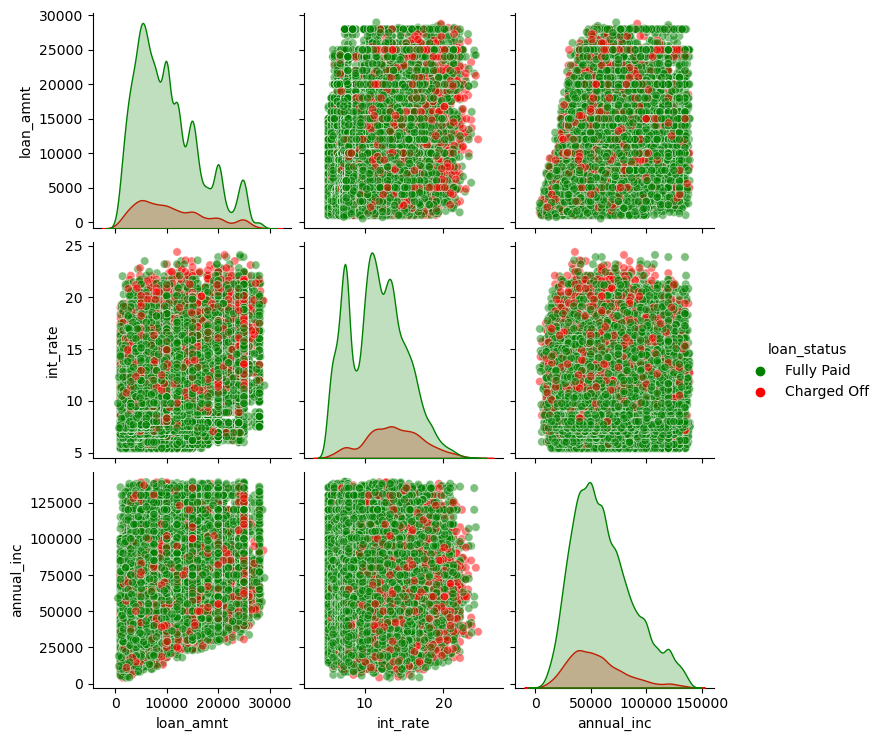

In [72]:
columns_of_interest = ['loan_amnt', 'int_rate', 'annual_inc','loan_status']
custom_palette = {"Fully Paid": "green", "Charged Off": "red"}
sns.pairplot(df[columns_of_interest], hue='loan_status', palette=custom_palette, plot_kws={'alpha': 0.5})

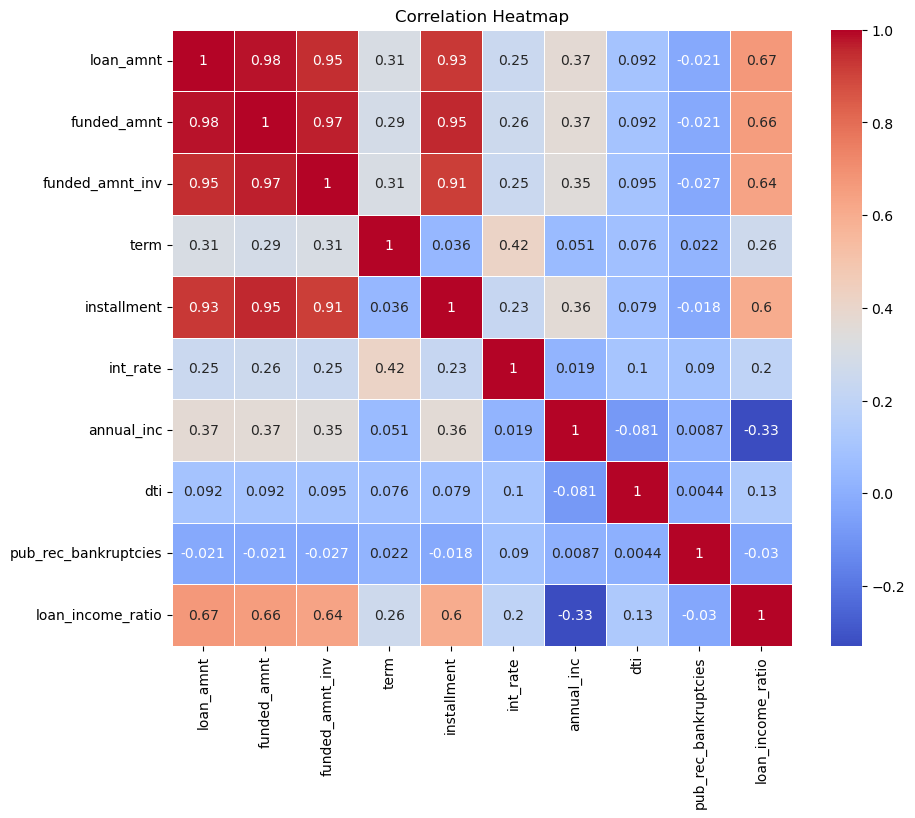

In [73]:
columns=['loan_amnt','funded_amnt','funded_amnt_inv','term','installment','int_rate','annual_inc','dti','pub_rec_bankruptcies','loan_income_ratio']
#Correlation matrix
correlation_matrix = df[columns].corr()
# Create heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Final Observations:

1. Grades B, C, and D have the highest occurrence of Charged Off loans, based on frequency counts.
2. Based on the counts, Grade B3,B4,B5 top sub grades in Charged Off.
3. Default rates are higher for 36-month loans compared to 60-month loans.
4. Borrowers with over 10 years of experience have the highest default rates, making them the primary defaulters.
5. The year 2011 saw the highest number of loans issued, with a significant portion of them being Charged Off during that year.
6. Plot of the loan issue month shows maximum loans were given in the month of Oct, Nov, Dec.Also high loans are being Charged Off for the loans issued in Sep,Oct,Nov,Dec.
7. Loans intended for debt consolidation, credit card payments, and home improvement, as well as small business ventures, are more likely to default compared to those for education or renewable energy.
8. Borrowers from California are more likely for defaulting on loans.
9. Individuals who rent or have a mortgage are more prone to loan default compared to homeowners.
10. The amount of Not verified loans which are Charged Off (default) is more compared to Verified,Source Verified.
11. Interest Rate with 13-17% have more loans default.
12. People who have annual income 50K-100k are more likely to loan default.